In [1]:
!pip install sentence-transformers
!pip install scikit-tda[all]
!pip install kmapper


In [31]:
sentences = [
    "Time is money",
    "He's skating on thin ice",
    "Break a leg",
    "A storm is brewing",
    "It’s raining cats and dogs",
    "She spilled the beans",
    "He has a heart of stone",
    "They’re barking up the wrong tree",
    "The ball is in your court",
    "A leopard can't change its spots",
    "Don’t cry over spilled milk",
    "Burning the midnight oil",
    "Jumping on the bandwagon",
    "The tip of the iceberg",
    "Caught between a rock and a hard place",
    "Kicking the can down the road",
    "Throwing the baby out with the bathwater",
    "Let the cat out of the bag",
    "A fish out of water",
    "Walking on eggshells",
    "The elephant in the room",
    "Don’t judge a book by its cover",
    "You can’t have your cake and eat it too",
    "A blessing in disguise",
    "Hit the nail on the head",
    "Kill two birds with one stone",
    "Bite the bullet",
    "Barking mad",
    "A chip on your shoulder",
    "The last straw",
    "Under the weather",
    "Take it with a grain of salt",
    "Throw in the towel",
    "Put all your eggs in one basket",
    "Riding high",
    "Out of the frying pan and into the fire",
    "The writing on the wall",
    "Let sleeping dogs lie",
    "Burning bridges",
    "Bite off more than you can chew",
    "Go the extra mile",
    "Hit the ground running",
    "Burned out",
    "Living in a bubble",
    "Walking a tightrope",
    "Like herding cats",
    "He’s a loose cannon",
    "Playing devil’s advocate",
    "A can of worms",
    "Opening Pandora’s box"
]

# sentences = [
#     "Hello!",
#     "Good morning!",
#     "Good afternoon!",
#     "Good evening!",
#     "Hi there!",
#     "How are you?",
#     "Nice to meet you!",
#     "How do you do?",
#     "Greetings!",
#     "Salutations!",
#     # ^ 9, below 10
#     "The farmer is plowing the field.",
#     "The cow is grazing in the pasture.",
#     "The pig is rooting in the mud.",
#     "The chicken is laying an egg.",
#     "The horse is pulling the cart.",
#     "The sheep are grazing in the meadow.",
#     "The farmer is harvesting the crops.",
#     "The barn is full of hay.",
#     "The tractor is driving through the farm.",
#     "The dog is chasing the chickens."
# ]


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('BAAI/bge-small-en-v1.5')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [32]:
embeddings = []
for i in sentences:
    embeddings.append(model.encode(i))

In [33]:
import numpy as np
embeddings = np.array(embeddings)

In [34]:
print("Shape of embeddings:", embeddings.shape)

Shape of embeddings: (50, 384)


/usr/local/lib/python3.11/dist-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


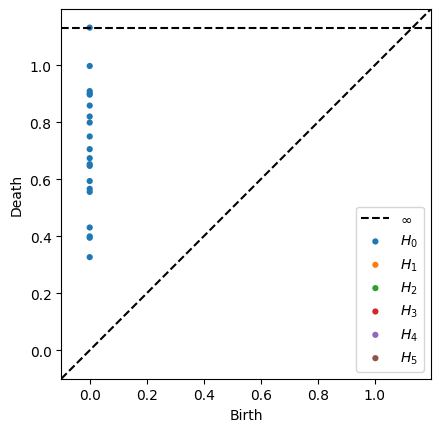

In [7]:
from ripser import ripser
from persim import plot_diagrams

diagrams = ripser(embeddings, maxdim=5)['dgms']
plot_diagrams(diagrams, show=True)

In [42]:
import kmapper as km
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

mapper = km.KeplerMapper(verbose=1)

lens = mapper.fit_transform(embeddings, projection=PCA(n_components=2))

graph = mapper.map(
    lens,
    embeddings,
    cover = km.Cover(n_cubes=6, perc_overlap=0.6),
    clusterer = DBSCAN(eps=0.75, min_samples=2)
)



KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (50, 384)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (50, 384) using lens shaped (50, 2)

Creating 36 hypercubes.

Created 8 edges and 9 nodes in 0:00:00.102690.


In [43]:
graph

{'nodes': defaultdict(list,
             {'cube3_cluster0': [3, 30],
              'cube4_cluster0': [3, 30],
              'cube6_cluster0': [7, 27],
              'cube7_cluster0': [7, 27],
              'cube9_cluster0': [3, 30],
              'cube10_cluster0': [3, 30],
              'cube27_cluster0': [26, 39],
              'cube31_cluster0': [31, 32],
              'cube33_cluster0': [26, 39]}),
 'links': defaultdict(list,
             {'cube3_cluster0': ['cube4_cluster0',
               'cube9_cluster0',
               'cube10_cluster0'],
              'cube4_cluster0': ['cube9_cluster0', 'cube10_cluster0'],
              'cube6_cluster0': ['cube7_cluster0'],
              'cube9_cluster0': ['cube10_cluster0'],
              'cube27_cluster0': ['cube33_cluster0']}),
 'simplices': [['cube3_cluster0'],
  ['cube4_cluster0'],
  ['cube6_cluster0'],
  ['cube7_cluster0'],
  ['cube9_cluster0'],
  ['cube10_cluster0'],
  ['cube27_cluster0'],
  ['cube31_cluster0'],
  ['cube33_cluster0'],


In [44]:
mapper.visualize(graph, path_html="/content/mapper_output.html", title="Mapper Graph")

from google.colab import files
files.download('mapper_output.html')


Wrote visualization to: /content/mapper_output.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
for node, indices in graph['nodes'].items():
    print(f"Node {node} ({len(indices)} points):")
    for i in indices:
        print(f"  {sentences[i]}")
    print()


Node cube3_cluster0 (2 points):
  A storm is brewing
  Under the weather

Node cube4_cluster0 (2 points):
  A storm is brewing
  Under the weather

Node cube6_cluster0 (2 points):
  They’re barking up the wrong tree
  Barking mad

Node cube7_cluster0 (2 points):
  They’re barking up the wrong tree
  Barking mad

Node cube9_cluster0 (2 points):
  A storm is brewing
  Under the weather

Node cube10_cluster0 (2 points):
  A storm is brewing
  Under the weather

Node cube27_cluster0 (2 points):
  Bite the bullet
  Bite off more than you can chew

Node cube31_cluster0 (2 points):
  Take it with a grain of salt
  Throw in the towel

Node cube33_cluster0 (2 points):
  Bite the bullet
  Bite off more than you can chew

